<a href="https://colab.research.google.com/github/haleyysanchez/MOSTEC_ML_PROJECT_2020/blob/master/ASL_ML_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#American Sign Language Machine Learning Project
Haley Sanchez, Myles Mackie, and Mohamed Musa

### Importing the Data

In [ ]:
from google.colab import drive
drive.mount('/content/drive')
#only necessary in Colaboratory (I stored our data in drive so we don't have to keep reuploading it).

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
asl_train = pd.read_csv('/content/drive/My Drive/ML_resources/sign_mnist_train.csv')
asl_test = pd.read_csv('/content/drive/My Drive/ML_resources/sign_mnist_test.csv')

In [ ]:
asl_train.head()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
asl_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27455 entries, 0 to 27454
Columns: 785 entries, label to pixel784
dtypes: int64(785)
memory usage: 164.4 MB


In [ ]:
asl_train.describe()

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
count,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,...,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000,27455.000000
mean,12.318813,145.419377,148.500273,151.247714,153.546531,156.210891,158.411255,160.472154,162.339683,163.954799,165.533673,166.685522,167.811983,168.495647,169.310872,169.956948,170.460463,170.716518,170.872701,170.808887,170.481442,169.979749,169.264506,168.144127,166.936660,165.765944,163.620725,161.933600,161.349117,147.146858,150.284502,152.941978,155.415043,158.068986,160.229576,162.345802,164.291167,165.736332,166.991732,168.503187,...,131.949918,134.583755,139.361974,148.115862,155.095465,160.346858,163.915607,165.364414,165.911273,165.182080,164.407977,163.488254,143.407758,144.189474,145.711637,147.660718,149.019414,148.670843,148.185212,147.298926,146.286323,144.027062,142.966017,139.769550,137.071572,135.277181,131.922783,130.232235,132.046367,135.289237,141.104863,147.495611,153.325806,159.125332,161.969259,162.736696,162.906137,161.966454,161.137898,159.824731
std,7.287552,41.358555,39.942152,39.056286,38.595247,37.111165,36.125579,35.016392,33.661998,32.651607,31.279244,30.558445,29.771007,29.329251,28.620248,27.961255,27.053544,26.763535,26.307419,26.088459,26.475963,26.940885,27.871515,29.368386,30.906718,31.902723,34.303747,35.991306,36.571064,41.555429,40.094304,39.427215,38.686176,37.242459,36.373576,35.242915,33.899171,32.759395,31.656140,30.833853,...,57.586028,60.373218,63.301768,63.300608,63.511566,62.551522,61.833119,62.210750,62.163516,61.958245,61.950177,62.403709,54.406116,53.658786,54.710497,54.613724,54.351761,55.233710,55.904715,57.155523,57.965677,57.393379,56.689603,56.118823,54.680900,55.278778,56.384076,58.111783,59.204300,62.553694,63.751194,65.512894,64.427412,63.708507,63.738316,63.444008,63.509210,63.298721,63.610415,64.396846
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,17.000000,23.000000,28.000000,34.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.

In [ ]:
asl_train.loc[20000:]

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
20000,19,102,109,115,120,125,128,129,132,136,139,142,144,147,149,151,153,156,156,157,159,161,162,161,163,163,163,164,164,104,111,117,122,127,129,131,135,137,142,144,...,188,192,194,195,194,196,196,196,197,197,197,197,132,140,143,156,176,156,140,125,107,93,86,88,77,128,191,186,193,194,194,196,196,197,196,197,198,199,198,197
20001,20,113,118,122,125,129,134,138,141,145,147,150,151,154,157,157,158,158,158,158,157,158,158,158,158,158,156,154,153,115,121,124,127,131,136,140,143,146,149,151,...,158,145,117,101,80,164,209,207,207,206,203,202,154,157,161,168,177,183,188,193,196,200,202,205,219,192,160,142,160,136,124,98,99,199,209,208,207,207,204,203
20002,18,184,185,185,185,185,186,186,186,186,186,185,184,183,182,181,180,181,180,178,178,177,175,174,173,171,172,170,167,186,186,186,187,187,187,186,187,187,187,187,...,140,130,113,87,70,188,201,198,197,197,195,193,207,209,209,211,212,211,211,212,207,203,190,176,177,164,153,140,133,122,103,70,121,211,198,199,198,196,194,194
20003,12,190,191,193,195,195,196,198,199,200,202,203,203,203,203,203,202,202,202,201,201,200,200,199,199,199,198,198,196,191,193,195,196,197,199,200,201,202,203,204,...,115,118,95,133,239,227,228,228,228,228,227,226,211,214,215,222,199,128,125,130,117,65,96,100,94,86,81,77,79,81,68,101,214,233,228,227,227,227,226,225
20004,14,122,125,126,128,131,133,136,138,139,141,143,144,145,147,149,150,151,151,151,152,153,154,154,154,154,154,154,155,124,125,126,128,131,134,137,138,139,142,144,...,102,106,111,109,113,164,179,175,177,177,176,176,140,142,146,149,152,158,150,171,189,171,160,146,116,102,104,102,101,104,108,106,156,180,176,178,177,177,177,177
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27450,13,189,189,190,190,192,193,193,193,193,194,193,193,194,194,195,195,196,194,195,196,196,197,196,197,197,196,195,195,189,190,192,192,193,194,195,196,196,196,193,...,115,92,132,173,118,84,53,135,253,213,219,208,82,82,84,85,85,87,84,87,78,113,216,189,172,175,155,131,116,93,132,165,99,77,52,200,234,200,222,225
27451,23,151,154,157,158,160,161,163,164,166,167,169,169,169,169,169,169,169,169,169,167,167,167,166,165,164,164,163,162,153,156,159,160,162,163,164,165,167,169,172,...,199,200,199,199,198,199,198,197,196,195,195,194,66,67,65,62,61,41,32,37,33,30,28,38,187,202,199,199,199,199,198,198,198,198,198,196,195,195,195,194
27452,18,174,174,174,174,174,175,175,174,173,173,173,172,171,171,171,170,169,168,166,166,165,165,163,162,161,160,158,156,178,178,177,176,177,177,177,176,176,176,175,...,110,85,90,166,205,207,205,203,202,201,200,198,217,217,217,218,218,211,203,200,189,171,157,145,136,129,128,125,101,77,121,196,209,208,206,204,203,202,200,200
27453,17,177,181,184,185,187,189,190,191,191,190,191,193,192,191,191,191,191,190,190,189,187,186,184,183,182,181,179,177,179,182,185,187,189,190,192,192,192,192,194,...,190,173,140,80,28,60,70,61,61,78,100,86,136,135,135,135,132,132,136,136,137,144,103,120,197,200,195,196,170,149,119,56,27,58,102,79,47,64,87,93


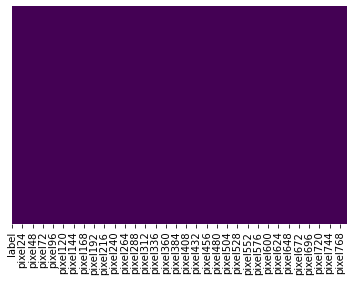

In [ ]:
sns.heatmap(asl_train.isnull(),yticklabels=False,cbar=False,cmap='viridis')


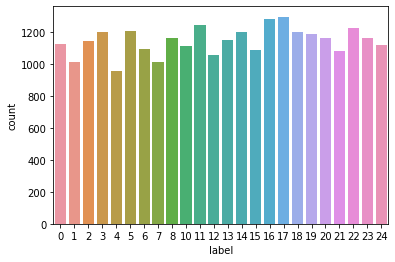

In [ ]:
sns.countplot(x='label', data=asl_train)

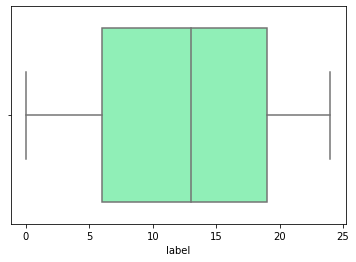

In [ ]:
sns.boxplot(data=asl_train, x = 'label', palette = 'rainbow')

In [ ]:
asl_train_head = asl_train.head()
asl_train_head

,label,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,...,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784
0,3,107,118,127,134,139,143,146,150,153,156,158,160,163,165,159,166,168,170,170,171,171,171,172,171,171,170,170,169,111,121,129,135,141,144,148,151,154,157,160,...,205,206,206,207,207,206,206,204,205,204,203,202,142,151,160,172,196,188,188,190,135,96,86,77,77,79,176,205,207,207,207,207,207,207,206,206,206,204,203,202
1,6,155,157,156,156,156,157,156,158,158,157,158,156,154,154,153,152,151,149,149,148,147,146,144,142,143,138,92,108,158,159,159,159,160,160,160,160,160,160,160,...,100,78,120,157,168,107,99,121,133,97,95,120,135,116,95,79,69,86,139,173,200,185,175,198,124,118,94,140,133,84,69,149,128,87,94,163,175,103,135,149
2,2,187,188,188,187,187,186,187,188,187,186,185,185,185,184,184,184,181,181,179,179,179,178,178,109,52,66,77,83,188,189,189,188,188,189,188,188,188,188,187,...,203,204,203,201,200,200,199,198,196,195,194,193,198,166,132,114,89,74,79,77,74,78,132,188,210,209,206,205,204,203,202,201,200,199,198,199,198,195,194,195
3,2,211,211,212,212,211,210,211,210,210,211,209,207,208,207,206,203,202,201,200,198,197,195,192,197,171,51,52,54,212,213,215,215,212,212,213,212,212,211,211,...,247,242,233,231,230,229,227,225,223,221,220,216,58,51,49,50,57,60,17,15,18,17,19,1,159,255,237,239,237,236,235,234,233,231,230,226,225,222,229,163
4,13,164,167,170,172,176,179,180,184,185,186,188,189,189,190,191,189,190,190,187,190,192,193,191,191,192,192,194,194,166,169,172,174,177,180,182,185,186,187,190,...,90,77,88,117,123,127,129,134,145,152,156,179,105,106,105,104,104,104,175,199,178,152,136,130,136,150,118,92,85,76,92,105,105,108,133,163,157,163,164,179


In [ ]:
pic1 = asl_train.drop('label', axis = 1).loc[0]
pic = np.array(pic1).reshape(28, 28)

### Splitting the Data:

In [ ]:
y_train = asl_train['label']
y_test = asl_test['label']
x_train = asl_train.drop('label', axis = 1)
x_test = asl_test.drop('label', axis = 1)

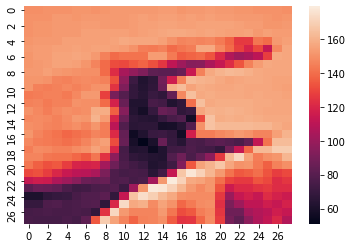

In [ ]:
sns.heatmap(np.array(x_test.loc[0]).reshape(28, 28))

### Tensor Flow:


In [ ]:
import tensorflow as tf
import keras
from keras.models import Model
from keras.models import Sequential, load_model
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
from keras.utils import np_utils


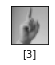

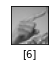

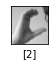

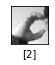

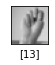

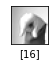

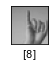

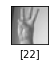

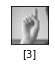

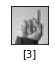

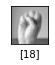

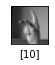

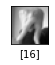

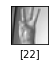

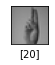

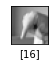

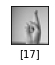

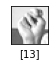

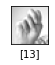

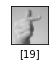

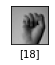

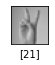

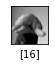

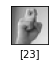

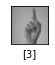

In [ ]:
#import matlplotlib.plyplot as plt
plt.figure()
for i in range(25):
  plt.subplot(5,5, i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(np.array(x_train.loc[i]).reshape(28, 28), cmap='gray', vmin=0, vmax=255)
  plt.xlabel([y_train[i]])
  plt.show()



In [ ]:
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D


In [ ]:
asl_train_images = np.array(asl_train.drop('label', axis = 1)).reshape(27455, 28, 28, 1)
asl_train_labels = np.array(asl_train['label'])

asl_test_images = np.array(asl_test.drop('label', axis = 1)).reshape(7172, 28, 28, 1)
asl_test_labels = np.array(asl_test['label'])

asl_train_images = asl_train_images/255.0
asl_test_images = asl_test_images/255.0


asl_train_labels = np_utils.to_categorical(asl_train_labels, 25)
asl_test_labels = np_utils.to_categorical(asl_test_labels, 25)

# len(asl_train_images)
# len(asl_train_labels)


In [ ]:
model = Sequential()

model.add(Conv2D(64, (3, 3), padding='same', activation='relu', input_shape=(28, 28, 1)))
model.add(Conv2D(32, (3, 3), padding='same', activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(32, (3, 3), padding="same", activation='relu'))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Conv2D(16, (3, 3), padding="same"))
model.add(Conv2D(8, (3, 3), padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# model.add(Conv2D(8, (3, 3), padding="same"))
# model.add(Conv2D(4, (3, 3), padding="same"))
# model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(128, activation='relu'))

model.add(Dropout(.7))

model.add(Dense(25, activation='softmax'))
model.summary()

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

model.fit(asl_train_images, asl_train_labels, batch_size=64, epochs=100)

model.save('/content/drive/My Drive/ML_resources/simple_cnn_with_keras_9.h5')
del model


Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 28, 28, 64)        640       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 28, 28, 32)        18464     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 14, 14, 32)        9248      
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 14, 14, 16)        4624      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 7, 7, 16)          0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 7, 7, 16)         

In [ ]:
from keras import backend as K
print(K.image_data_format())

channels_last


In [ ]:
cnn_model = load_model('/content/drive/My Drive/ML_resources/simple_cnn_with_keras_9.h5')
accuracy_loss = cnn_model.evaluate(asl_test_images, asl_test_labels, verbose=2)
print('Test Loss', accuracy_loss[0])
print('Test Accuracy', accuracy_loss[1])

225/225 - 6s - loss: 0.3245 - accuracy: 0.9639
Test Loss 0.32451331615448
Test Accuracy 0.9638873338699341


In [ ]:
# pd.DataFrame(asl_train_labels).head()

In [ ]:
from PIL import Image, ImageOps
img = Image.open('/content/drive/My Drive/ML_resources/5f.png').convert('LA')
img_mirror = ImageOps.mirror(img)
img_mirror.save('/content/drive/My Drive/ML_resources/5f_grey.png')

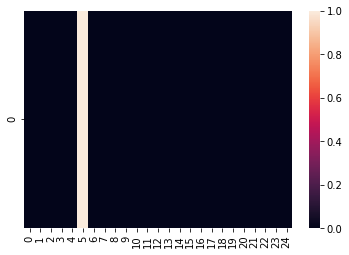

In [ ]:
image = Image.open('/content/drive/My Drive/ML_resources/5f_grey.png')
test_frame = np.asarray(image).reshape(784, 2)
test_label = '1'
df = pd.DataFrame(test_frame)
df = df.drop(1, axis = 1)
test_frame = np.array(df).reshape(1, 28, 28, 1)

cnn_model = load_model('/content/drive/My Drive/ML_resources/simple_cnn_with_keras_9.h5')
# accuracy_loss = cnn_model.evaluate(test_frame, test_label, verbose=2)
# print('Test Loss', accuracy_loss[0])
# print('Test Accuracy', accuracy_loss[1])
pred = cnn_model.predict(test_frame)

sns.heatmap(pred)
# asl_test_labels[-1]

In [ ]:
image = Image.open('/content/drive/My Drive/ML_resources/Bpng_greyscale.png')
test_frame = np.asarray(image).reshape(784, 2)
test_label = ['26']
df = pd.DataFrame(test_frame)
df = df.drop(1, axis = 1)
test_frame = np.array(df).reshape(28, 28)
pd.DataFrame(test_frame)

In [ ]:
y_pred = cnn_model.predict_classes(asl_test_images)
con_mat = tf.math.confusion_matrix(labels=asl_test['label'], predictions=y_pred, num_classes=25).numpy()
# asl_test_labels.shape

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


In [ ]:
# v = np.sort(pd.Series(y_pred).unique())
v = np.sort(asl_test['label'].unique())
print(v)

[ 0  1  2  3  4  5  6  7  8 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24]


In [ ]:
# this fixed the weird error
# deletes the value based on the index in the array
# con_mat = np.delete(con_mat, 9, 0)
# con_mat = np.delete(con_mat, 9, 1)

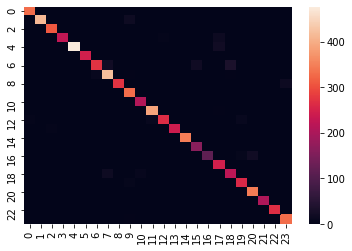

In [ ]:
sns.heatmap(con_mat)

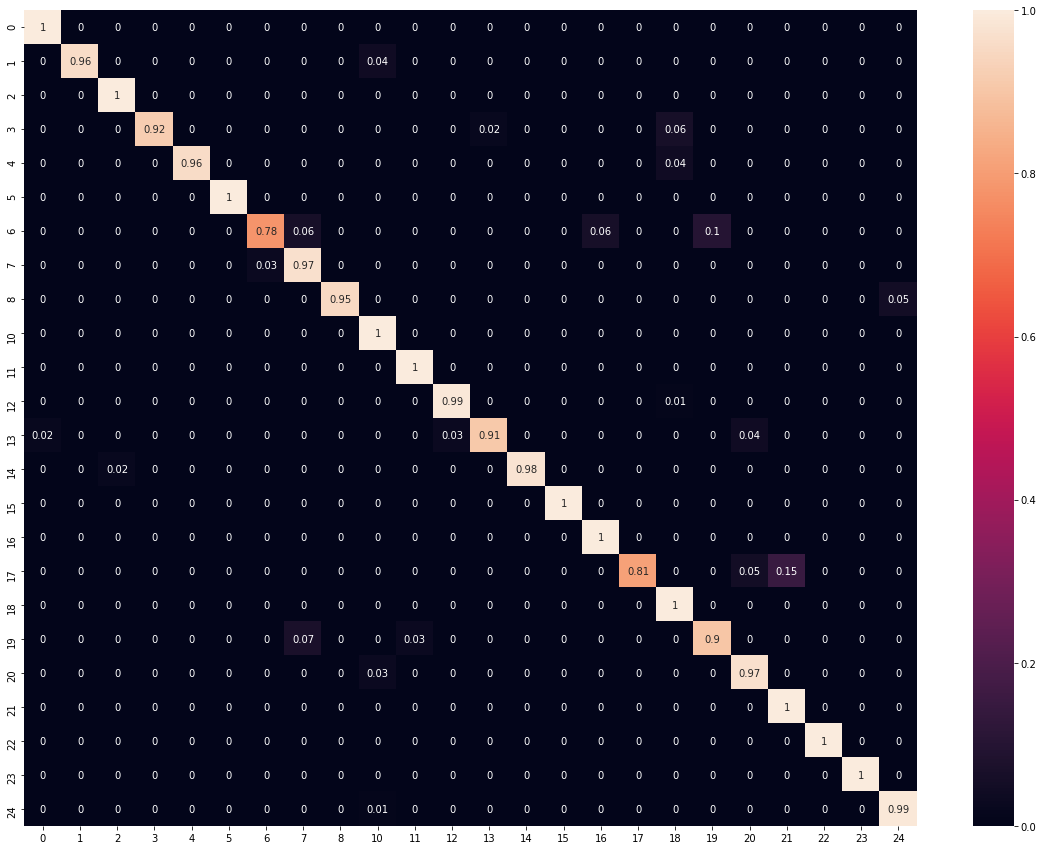

In [ ]:
labels_nums = [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24]

fig, ax = plt.subplots(figsize=(20,15))
# sns.heatmap(df1, annot=True, linewidths=.5, ax=ax)

con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
con_mat_df = pd.DataFrame(con_mat_norm,index = labels_nums,columns = labels_nums)
sns.heatmap(con_mat_df, annot=True, ax=ax)
# # con_mat_df.loc[0]
# # con_mat_norm.shape
# con_mat.sum(axis=1)
# con_mat[0:8,:]
# con_mat[10:24,:]
# np.delete(con_mat, 9, 0)
# np.delete(con_mat, 9, 1)


In [ ]:
# y_pred = cnn_model.predict_classes(test_frame)
# con_mat = tf.math.confusion_matrix(labels= "26", predictions=y_pred).numpy()
# con_mat_norm = np.around(con_mat.astype('float') / con_mat.sum(axis=1)[:, np.newaxis], decimals=2)
# labels_nums = [0,1,2,3,4,5,6,7,8,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,26]
# con_mat_df = pd.DataFrame(con_mat_norm, index = [0] , columns = labels_nums)
# # con_mat_df.loc[0]